In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6f6c17237c6dc779b53dc2461d1b4ee6


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | synya
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | corinto
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | tromso
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | victor harbor
Processing Record 21 of Set 1 | samusu
City not found. Sk

Processing Record 38 of Set 4 | ahuimanu
Processing Record 39 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 4 | sao lourenco
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | sao joaquim da barra
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | colmar
Processing Record 47 of Set 4 | coulihaut
City not found. Skipping...
Processing Record 48 of Set 4 | rocha
Processing Record 49 of Set 4 | molteno
Processing Record 50 of Set 4 | belle fourche
Processing Record 1 of Set 5 | nantong
Processing Record 2 of Set 5 | dikson
Processing Record 3 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 5 | zhigansk
Processing Record 5 of Set 5 | maniitsoq
Processing Record 6 of Set 5 | college
Processing Record 7 of Set 5 | rosarito
Processing Record 8 of Set 5 | new norfolk
Processing R

Processing Record 30 of Set 8 | ossora
Processing Record 31 of Set 8 | verkhoyansk
Processing Record 32 of Set 8 | hobyo
Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | poronaysk
Processing Record 36 of Set 8 | honiara
Processing Record 37 of Set 8 | uzunkopru
City not found. Skipping...
Processing Record 38 of Set 8 | la peca
Processing Record 39 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 40 of Set 8 | mount gambier
Processing Record 41 of Set 8 | taunggyi
Processing Record 42 of Set 8 | ugoofaaru
Processing Record 43 of Set 8 | basoko
Processing Record 44 of Set 8 | yanan
City not found. Skipping...
Processing Record 45 of Set 8 | luderitz
Processing Record 46 of Set 8 | vanavara
Processing Record 47 of Set 8 | broadstairs
Processing Record 48 of Set 8 | kazachinskoye
Processing Record 49 of Set 8 | arkadelphia
Processing Record 50 of Set 8 | krasnoselkup
Processing Record 1 of Set 9 | nguru
Processi

Processing Record 19 of Set 12 | port blair
Processing Record 20 of Set 12 | boyolangu
Processing Record 21 of Set 12 | juneau
Processing Record 22 of Set 12 | pontian kecil
Processing Record 23 of Set 12 | gallup
Processing Record 24 of Set 12 | baymak
Processing Record 25 of Set 12 | kyzyl-suu
Processing Record 26 of Set 12 | natal
Processing Record 27 of Set 12 | saulkrasti
Processing Record 28 of Set 12 | camacha
Processing Record 29 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 12 | mago
Processing Record 31 of Set 12 | hami
Processing Record 32 of Set 12 | rungata
City not found. Skipping...
Processing Record 33 of Set 12 | zhaotong
Processing Record 34 of Set 12 | changji
Processing Record 35 of Set 12 | te anau
Processing Record 36 of Set 12 | nigde
Processing Record 37 of Set 12 | viligili
City not found. Skipping...
Processing Record 38 of Set 12 | haapsalu
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | toccoa
Pro

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,80.60,94,40,12.66,MU,2021-01-11 17:38:09
1,Chokurdakh,70.6333,147.9167,-35.68,82,5,2.93,RU,2021-01-11 17:38:09
2,Synya,65.3718,58.0387,-14.89,81,31,2.33,RU,2021-01-11 17:38:10
3,Hasaki,35.7333,140.8333,34.00,75,75,6.91,JP,2021-01-11 17:38:10
4,Corinto,37.9407,22.9573,64.99,51,66,1.01,GR,2021-01-11 17:38:10
5,Mount Isa,-20.7333,139.5000,82.40,57,16,6.91,AU,2021-01-11 17:38:11
6,Vostok,46.4856,135.8833,-7.80,85,43,4.43,RU,2021-01-11 17:38:11
7,Jamestown,42.0970,-79.2353,37.99,64,1,10.36,US,2021-01-11 17:34:51
8,Atuona,-9.8000,-139.0333,77.25,81,53,16.06,PF,2021-01-11 17:38:11
9,Puerto Ayora,-0.7393,-90.3518,77.00,88,11,5.01,EC,2021-01-11 17:38:11


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2021-01-11 17:38:09,-20.4081,57.7000,80.60,94,40,12.66
1,Chokurdakh,RU,2021-01-11 17:38:09,70.6333,147.9167,-35.68,82,5,2.93
2,Synya,RU,2021-01-11 17:38:10,65.3718,58.0387,-14.89,81,31,2.33
3,Hasaki,JP,2021-01-11 17:38:10,35.7333,140.8333,34.00,75,75,6.91
4,Corinto,GR,2021-01-11 17:38:10,37.9407,22.9573,64.99,51,66,1.01
5,Mount Isa,AU,2021-01-11 17:38:11,-20.7333,139.5000,82.40,57,16,6.91
6,Vostok,RU,2021-01-11 17:38:11,46.4856,135.8833,-7.80,85,43,4.43
7,Jamestown,US,2021-01-11 17:34:51,42.0970,-79.2353,37.99,64,1,10.36
8,Atuona,PF,2021-01-11 17:38:11,-9.8000,-139.0333,77.25,81,53,16.06
9,Puerto Ayora,EC,2021-01-11 17:38:11,-0.7393,-90.3518,77.00,88,11,5.01


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

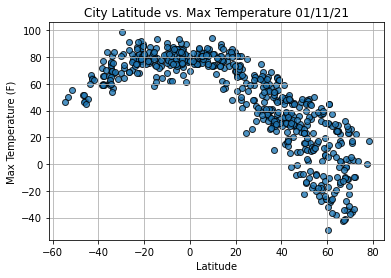

In [14]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

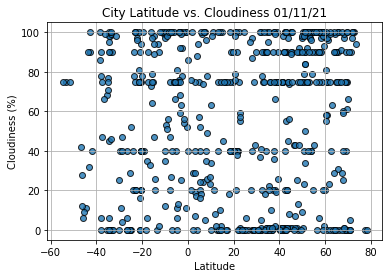

In [21]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

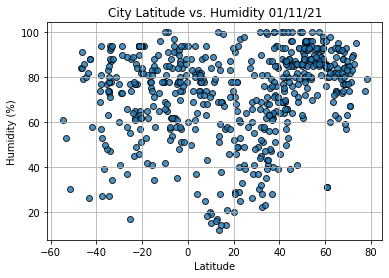

In [20]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

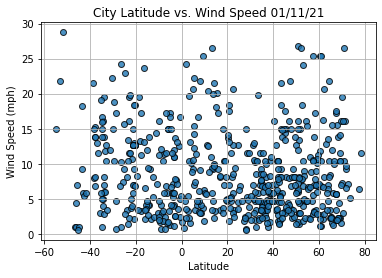

In [22]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

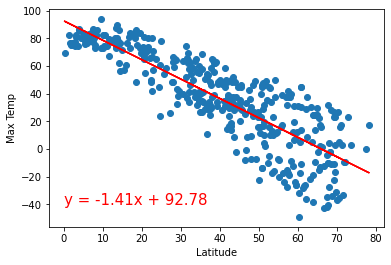

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere\for Maximum Temperature", 'Max Temp',(0,-40))


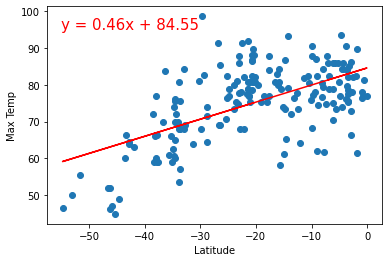

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere\for Maximum Temperature", 'Max Temp',(-55,95))

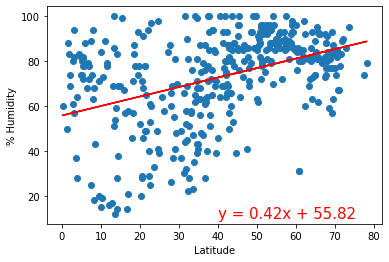

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

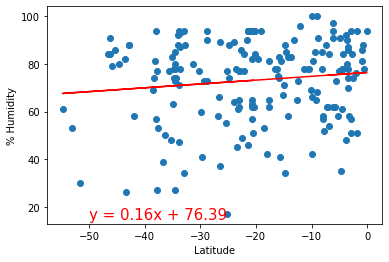

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

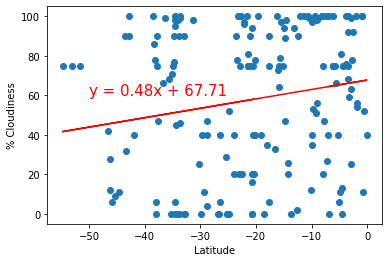

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


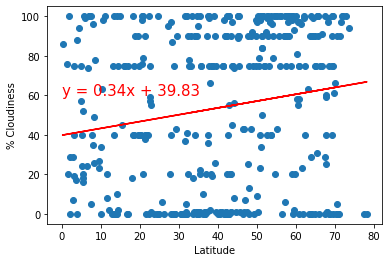

In [46]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,60))


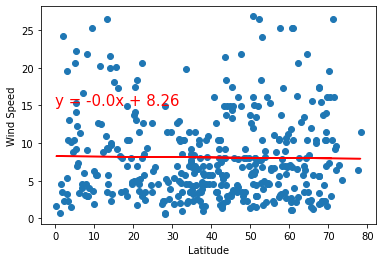

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \for Wind Speed', 'Wind Speed',(0,15))


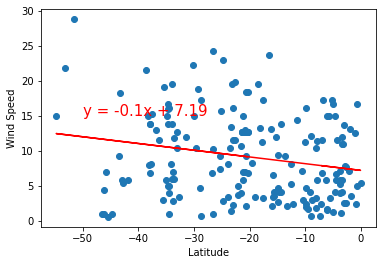

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))